In [4]:
import seaborn as sns
import pandas as pd

tmdb = pd.read_csv("fixtures/tmdb/tmdb_5000_movies.csv")

In [5]:
tmdb["original_language"].value_counts()

contagem_de_linguas = tmdb["original_language"].value_counts().to_frame().reset_index()

contagem_de_linguas.columns = ['original_language', 'total']

<AxesSubplot:xlabel='original_language', ylabel='total'>

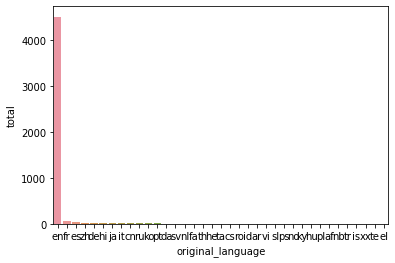

In [6]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_linguas)

([<matplotlib.patches.Wedge at 0x15f252be670>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

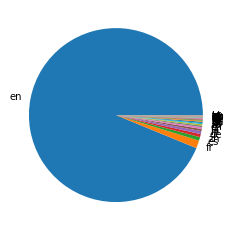

In [7]:
import matplotlib.pyplot as plt

plt.pie(contagem_de_linguas['total'], labels = contagem_de_linguas['original_language'])

In [8]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles

print(f'Total de inglês: {total_de_ingles}')
print(f'Total do resto: {total_do_resto}')
print(f'Total geral: {total_geral}')


Total de inglês: 4505
Total do resto: 298
Total geral: 4803


# Dataframe: Inglês vs resto

In [9]:
dados = {
  'lingua': ['ingles', 'outros'],
  'total': [total_de_ingles, total_do_resto]
}

print(dados)

pd.DataFrame(dados)

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}


,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:>

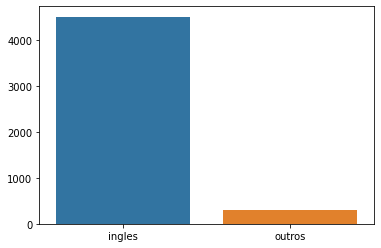

In [10]:
sns.catplot(x = "original_language", kind="count", data = tmdb)

([<matplotlib.patches.Wedge at 0x15f2542a130>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

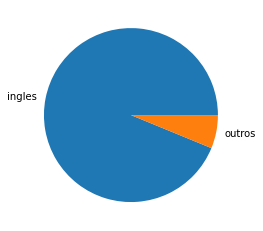

In [12]:
plt.pie(dados["total"], labels = dados["lingua"])

In [28]:
filmes_diferentes_ingles = tmdb.query("original_language != 'en'")

total_por_lingua_diferente_ingles = filmes_diferentes_ingles.sum()


print(f'Filmes cujo idioma original é diferente de inglês: {total_por_lingua_diferente_ingles}')

Filmes cujo idioma original é diferente de inglês: budget                                                         2576730820
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
id                                                               23237466
keywords                [{"id": 1299, "name": "monster"}, {"id": 7671,...
original_language       jafrzhfreszhzhfrfrdehiruzhzhfrfrfrzhkofrtezhzh...
original_title          シン・ゴジラAstérix aux Jeux Olympiques金陵十三釵Évolutio...
popularity                                                    3318.176404
production_companies    [{"name": "Cine Bazar", "id": 5896}, {"name": ...
production_countries    [{"iso_3166_1": "JP", "name": "Japan"}][{"iso_...
release_date            2016-07-292008-01-132011-12-152015-09-142015-1...
revenue                                                        5510629637
runtime                                                           33563.0
spoken_languages        [{"iso_639_1": "it", "name": "Italian

C:\Users\joaoa\AppData\Local\Temp/ipykernel_14920/688823568.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_por_lingua_diferente_ingles = filmes_diferentes_ingles.sum()


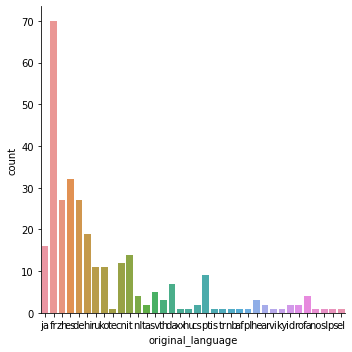

In [29]:
sns.catplot(x = "original_language", kind="count", data = filmes_diferentes_ingles)

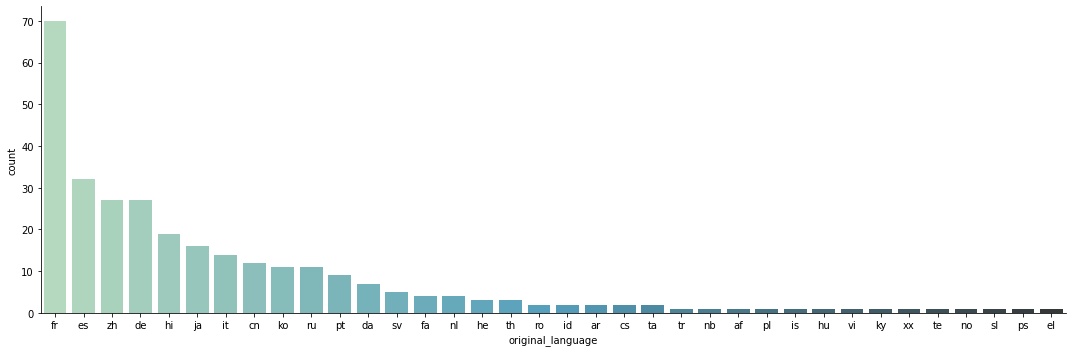

In [43]:
filmes_diferentes_ingles = tmdb.query("original_language != 'en'") # Pegando dados diferente de inglês
total_por_lingua_diferente_ingles = tmdb.query("original_language != 'en'")["original_language"].value_counts()


sns.catplot(x = "original_language", kind="count", aspect = 3, order = total_por_lingua_diferente_ingles.index, palette = "GnBu_d", data = filmes_diferentes_ingles) # Configurando tamanho do gráfico